# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
!pip install tensorflow

In [ ]:
!pip install scikeras

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UT AI/My Projects/Project 4: Bank Churn Prediction/Churn.csv")

In [ ]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

## Data Overview

###Displaying the first and the last five rows of the dataset

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Checking the shape of the dataset

In [ ]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10000 rows and 14 columns.


### Checking the duplicate data.

In [ ]:
data[data.duplicated()].count()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**CONCLUSION:** There are no duplicated values in the dataset.

### Checking the data types of the columns for the dataset

In [ ]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**CONCLUSION:**

* Dependent variable is `Exited`, which if of *int* type.
* `Surname`, `Geography`, `Gender` are of *object* type.
* All other columns are numeric in nature.

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**CONCLUSION:** There are no missing values in any of the columns.

### Checking the statistical summary

#### Checking numeric types

In [ ]:
# Let's look at the statistical summary of the data
#here we use .apply(lambda x: x.apply('{0:.5f}'.format)) in order to suppress scientific notation
data.describe().apply(lambda x: x.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00000,5000.50000,2886.89568,1.00000,2500.75000,5000.50000,7500.25000,10000.00000
CustomerId,10000.00000,15690940.56940,71936.18612,15565701.00000,15628528.25000,15690738.00000,15753233.75000,15815690.00000
CreditScore,10000.00000,650.52880,96.65330,350.00000,584.00000,652.00000,718.00000,850.00000
Age,10000.00000,38.92180,10.48781,18.00000,32.00000,37.00000,44.00000,92.00000
Tenure,10000.00000,5.01280,2.89217,0.00000,3.00000,5.00000,7.00000,10.00000
Balance,10000.00000,76485.88929,62397.40520,0.00000,0.00000,97198.54000,127644.24000,250898.09000
NumOfProducts,10000.00000,1.53020,0.58165,1.00000,1.00000,1.00000,2.00000,4.00000
HasCrCard,10000.00000,0.70550,0.45584,0.00000,0.00000,1.00000,1.00000,1.00000
IsActiveMember,10000.00000,0.51510,0.49980,0.00000,0.00000,1.00000,1.00000,1.00000
EstimatedSalary,10000.00000,100090.23988,57510.49282,11.58000,51002.11000,100193.91500,149388.24750,199992.48000


**Analysis:**

* **CreditScore**: min 350, max 850, mean 650, median 652.

>at least 25% of customers have Credit Score 584 or lesser.

>at least 25% of customers have Credit Score 718 or bigger.

* **Age**: min 18, max 92, mean 39, median 37.

>at least 25% of customers are 32 yo or younger.

> at least 25% of customers are 44 yo or older.

* **Tenure** (Number of years for which the customer has been with the bank): min 0, max 10, mean 5, median 5.

>at least 25% of customers have $0 on their accounts.

>at least 25% of customers have been with the bank 7 years or more.


* **Balance**: min $0, max \$250898.09, mean \$76485.89, median \$97198.54.

>at least 25% of customers have \$0 on their accounts.

>at least 25% of customers have \$127644.24 on their accounts or more.

* **NumOfProducts** (Number of products that a customer has purchased through the bank): min 1, max 4, median 1.

>at least 50% of customers have only 1 product.

>at least 25% of customers have 2 products or more.

* **HasCrCard** (Customer has a credit card or not): min 0, max 1, median 1.

>at least 25% of customers do not have a credit card.

>at least 50% of customers have a credit card.

* **IsActiveMember**: min 0, max 1, median 1.

>at least 25% of customers are not active members.

>at least 50% of customers are active members.

* **EstimatedSalary**: min \$11.58, max \$199992.48, mean \$100090.24, median \$100193.92.

>at least 25% of customers are making \$51002.11 a year or less.

>at least 25% of customers are making \$149388.25 a year or more.

* **Exited** (Customer left the bank within six months or not): min 0, max 1, median 0.

>at least 75% of customers did not leave the bank within six months.


**Sanity check:**

Looking at min and max, there are no negative values and no too big numbers, so the data look reliable. The only "red flag" is EstimatedSalary, since the min (\$11.58) doesn't look reasonable.

#### Checking object types

In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
object_columns = data.select_dtypes(include='object').columns #way 1
#object_columns = data.describe(include=[object]).columns #way 2 (version 1)
#object_columns = data.describe(include='object').columns #way 2 (version 2)

print("*" * 50)
print("*" * 50)
for col in object_columns:
    counts = data[col].value_counts()
    percs = data[col].value_counts(normalize=True)
    print("Unique values in", col, "are:")
    print("" * 50)
    print(pd.concat([counts,percs], axis=1, keys=['count', 'percentage']))
    print("" * 50)
    print("*" * 50)
    print("*" * 50)

**************************************************
**************************************************
Unique values in Surname are:

          count  percentage
Smith        32      0.0032
Scott        29      0.0029
Martin       29      0.0029
Walker       28      0.0028
Brown        26      0.0026
...         ...         ...
Izmailov      1      0.0001
Bold          1      0.0001
Bonham        1      0.0001
Poninski      1      0.0001
Burbidge      1      0.0001

[2932 rows x 2 columns]

**************************************************
**************************************************
Unique values in Geography are:

         count  percentage
France    5014      0.5014
Germany   2509      0.2509
Spain     2477      0.2477

**************************************************
**************************************************
Unique values in Gender are:

        count  percentage
Male     5457      0.5457
Female   4543      0.4543

**************************************************

**Analysis:**

* **Surname**: The most popular last name is Smith.

* **Geography**: More than half of the customers are from France.

>The number of customers from Germany and from Spain is about the same.

* **Gender**: 54.6\% of the customers are Male, 45.4\% of the customers are Female.


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    qntQ1=np.quantile(data[feature], .25)
    qntQ2=np.quantile(data[feature], .50)
    qntQ3=np.quantile(data[feature], .75)
    IQR=qntQ3-qntQ1
    W1=max(qntQ1-1.5*IQR,data[feature].min())
    W2=min(qntQ3+1.5*IQR,data[feature].max())
    print("Q1 quartile: ", qntQ1)
    print("Q2 quartile: ", qntQ2)
    print("Q3 quartile: ", qntQ3)
    print("IQR: ", IQR)
    print("Whisker1: ", W1)
    print("Whisker2: ", W2)
    print("Min: ", data[feature].min())
    print("Mean: ", data[feature].mean())
    print("Max: ", data[feature].max())
    shp1=data[data[feature]<=W1].shape
    shp2=data[data[feature]>=W2].shape
    print(shp1[0], " (", round(shp1[0]*100/data.shape[0], 2),"%)"," of customers: <= ", W1, sep='')
    print(shp2[0], " (",round(shp2[0]*100/data.shape[0],2),"%)"," of customers: >= ", W2, sep='')

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter,
        ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter,
        ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

####Categorical Variables

#####**Surname**

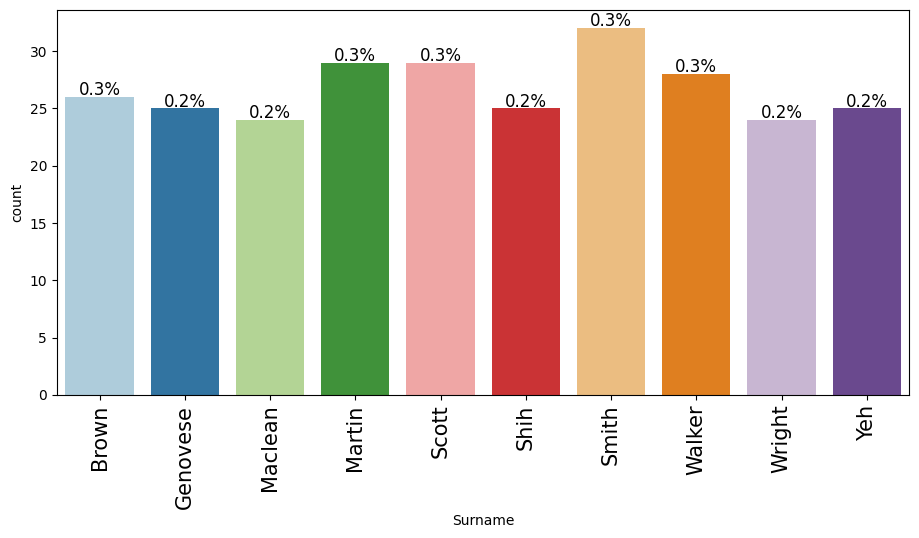

None


In [ ]:
feature='Surname'
print(labeled_barplot(data, feature, perc=True, n=10))

**CONCLUSION**: The most popular last names are Smith, Scott, and Martin.

#####**Geography**

In [ ]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

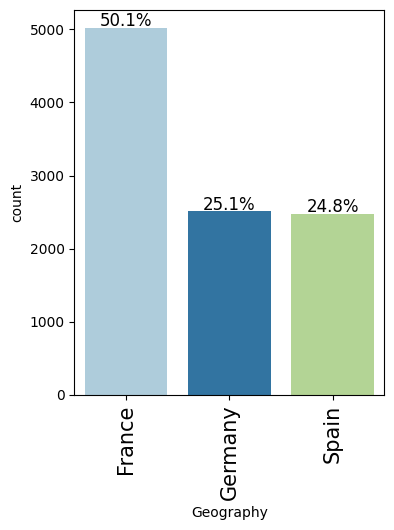

None


In [ ]:
feature='Geography'
print(labeled_barplot(data, feature, perc=True));

**CONCLUSION**: More than half of the customers are from France.

The number of customers from Germany and from Spain is about the same.


#####**Gender**

In [ ]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

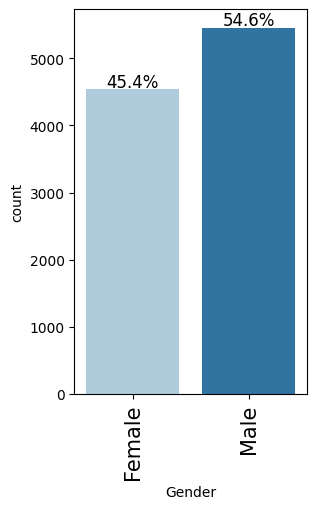

None


In [ ]:
feature='Gender'
print(labeled_barplot(data, feature, perc=True));

**CONCLUSION**:

5457 (54.6%) customers are Male

4543 (45.4%) customers are Female.

#####**Tenure** (Number of years for which the customer has been with the bank)

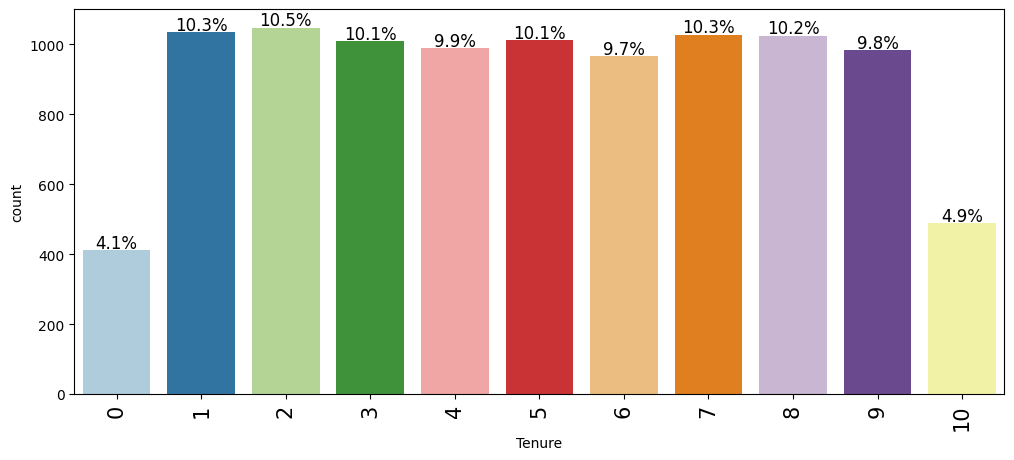

None


In [ ]:
feature='Tenure'
print(labeled_barplot(data, feature, perc=True));

**CONCLUSION**:

*   More than 90% of customers have been with the bank between 1 and 9 years.
*   Less than 5% of customers have been with the bank 0 years. Less than 5% of customers have been with the bank 10 years.
*   About 10% of customers have been with the bank N years, where N is any given integer between 1 and 9.



#####**NumOfProducts** (Number of products that a customer has purchased through the bank)

In [ ]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

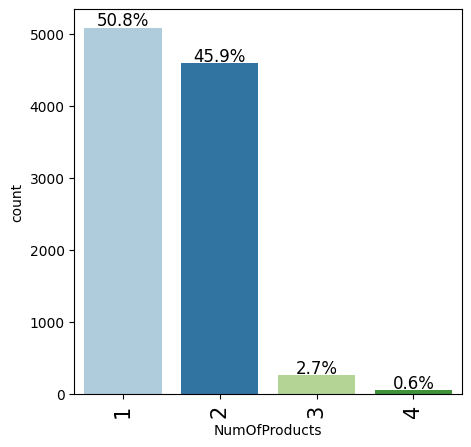

None


In [ ]:
feature='NumOfProducts'
print(labeled_barplot(data, feature, perc=True));

**CONCLUSION**:

* 5084 (50.8%) customers purchased 1 product through the bank

* 4590 (45.9%) customers purchased 2 products through the bank

* Only 326 (3.3%) customers purchased more than 2 products through the bank

#####**HasCrCard** (Customer has a credit card or not)

In [ ]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

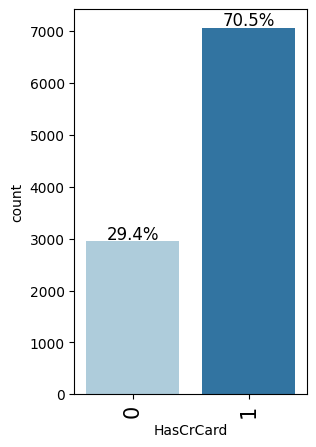

None


In [ ]:
feature='HasCrCard'
print(labeled_barplot(data, feature, perc=True));

**CONCLUSION**:

* 7055 (70.5%) customers have credit cards

* 2945 (29.4%) customers do not have credit cards

#####**IsActiveMember** (Customer is an active member of the bank or not)

In [ ]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

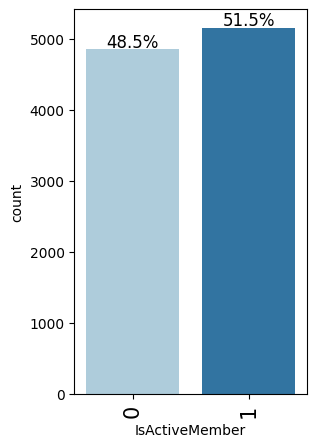

None


In [ ]:
feature='IsActiveMember'
print(labeled_barplot(data, feature, perc=True));

**CONCLUSION**:

* 4849 (48.5%) customers are not active members.

* 5151 (51.5%) customers are active members.

#####**Exited** (Customer left the bank within six months or not. Target variable.)

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

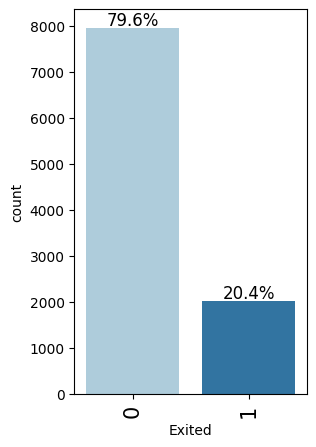

None


In [ ]:
feature='Exited'
print(labeled_barplot(data, feature, perc=True));

**CONCLUSION**:

* 7963 (79.6%) customers did not leave the bank within six months.

* 2037 (20.4%) customers left the bank within six months.

####Numeric Variables

#####Credit Score

Q1 quartile:  584.0
Q2 quartile:  652.0
Q3 quartile:  718.0
IQR:  134.0
Whisker1:  383.0
Whisker2:  850
Min:  350
Mean:  650.5288
Max:  850
16 (0.16%) of customers: <= 383.0
233 (2.33%) of customers: >= 850
None


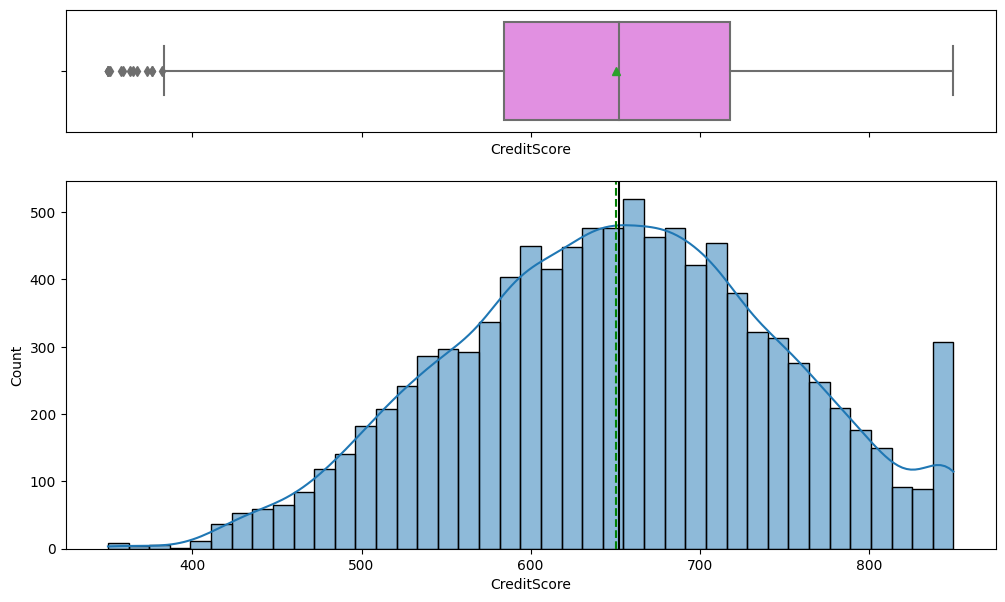

In [ ]:
feature='CreditScore'
print(histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None))

In [ ]:
data[data['CreditScore']>=840]['CreditScore'].value_counts()

850    233
841     12
849      8
842      7
844      7
845      6
847      6
846      5
840      5
848      5
843      2
Name: CreditScore, dtype: int64

In [ ]:
dataL850=data[data['CreditScore']<850]

Q1 quartile:  582.0
Q2 quartile:  649.0
Q3 quartile:  712.0
IQR:  130.0
Whisker1:  387.0
Whisker2:  849
Min:  350
Mean:  645.7702467492577
Max:  849
17 (0.17%) of customers: <= 387.0
8 (0.08%) of customers: >= 849
None


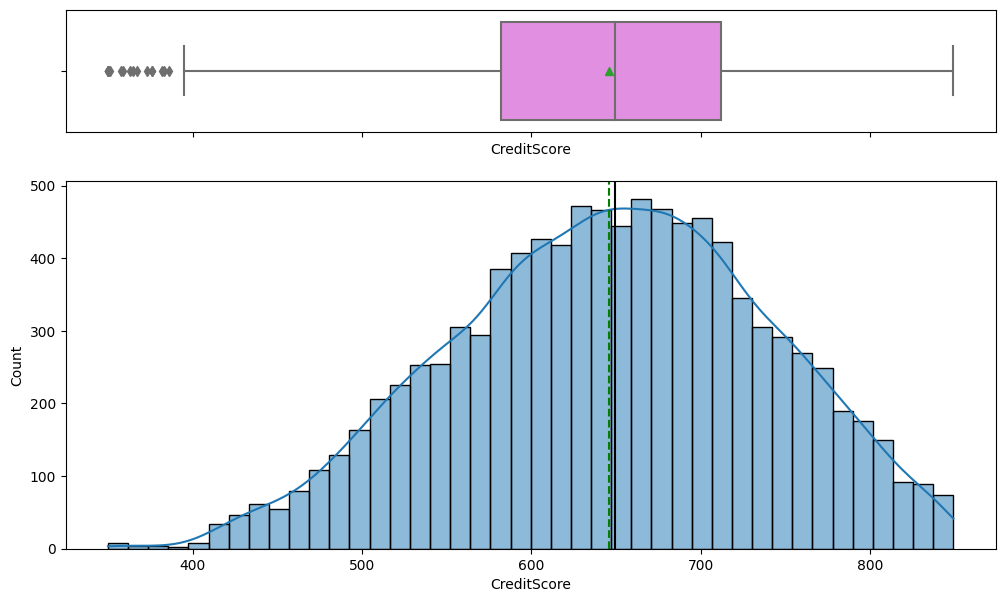

In [ ]:
feature='CreditScore'
print(histogram_boxplot(dataL850, feature, figsize=(12, 7), kde=True, bins=None))

**CONCLUSION**: The histogram for CreditScore is skewed to the left.
Mean (650.5)< Median (652). The distribution looks skewed normal.

Min credit score of customers is 350.

Credit scores of 25% of customers are at most 584.

Credit scores of 50% of customers are at most 652.

Credit scores of 75% of customers are at most 718.

Max credit score of customers is 850.

There are 16 outliers on the left. That is, 16 customers have credit scores at most 383.

The whisker on the right is equal to max (850). However, there are also
outliers on the right, since 233 customers have the maximum credit score (850).

**NOTE**: Once we remove the customers with the maximum credit score (850), we get slightly different results:

There are 17 outliers on the left. That is, 17 customers have credit scores at most 387.

There are 8 outliers on the left. That is, 8 customers have credit scores = 849.



#####Age

Q1 quartile:  32.0
Q2 quartile:  37.0
Q3 quartile:  44.0
IQR:  12.0
Whisker1:  18
Whisker2:  62.0
Min:  18
Mean:  38.9218
Max:  92
22 (0.22%) of customers: <= 18
411 (4.11%) of customers: >= 62.0
None


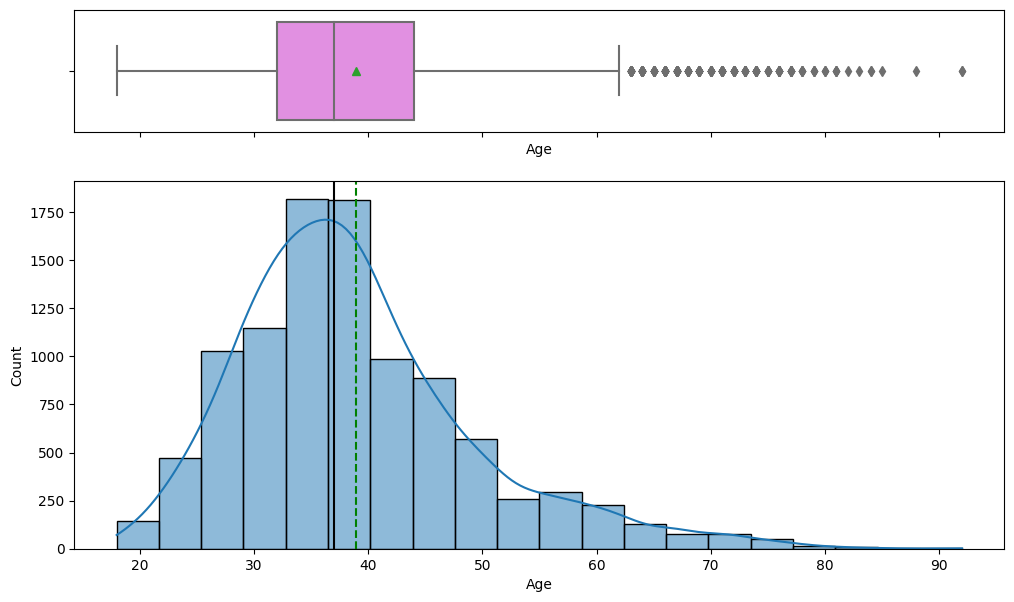

In [ ]:
feature='Age'
print(histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=20))

**CONCLUSION**: The histogram for Age is skewed to the right.
Mean (38.9)> Median (37). The distribution looks Skew normal.

Min age of customers is 18.

25% of customers are 32yo or younger.

50% of customers are 37yo or younger.

75% of customers are 44yo or younger.

Max age of customers is 92.

There are 22 outliers on the left. That is, 22 customers are 18yo.

There are 233 outliers on the right. That is, 233 customers are 62yo or older.


#####Balance

Q1 quartile:  0.0
Q2 quartile:  97198.54000000001
Q3 quartile:  127644.24
IQR:  127644.24
Whisker1:  0.0
Whisker2:  250898.09
Min:  0.0
Mean:  76485.889288
Max:  250898.09
3617 (36.17%) of customers: <= 0.0
1 (0.01%) of customers: >= 250898.09
None


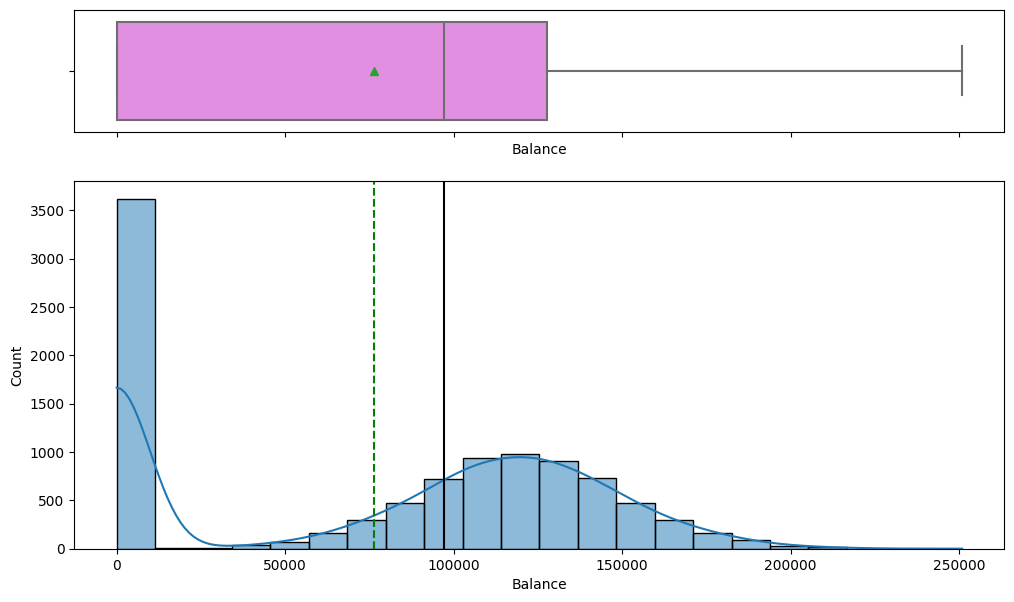

In [ ]:
feature='Balance'
print(histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None))

In [ ]:
dataG0=data[data['Balance']>0]

Q1 quartile:  100181.975
Q2 quartile:  119839.69
Q3 quartile:  139512.29
IQR:  39330.315
Whisker1:  41186.5025
Whisker2:  198507.7625
Min:  3768.69
Mean:  119827.49379288736
Max:  250898.09
36 (0.56%) of customers: <= 41186.5025
37 (0.58%) of customers: >= 198507.7625
None


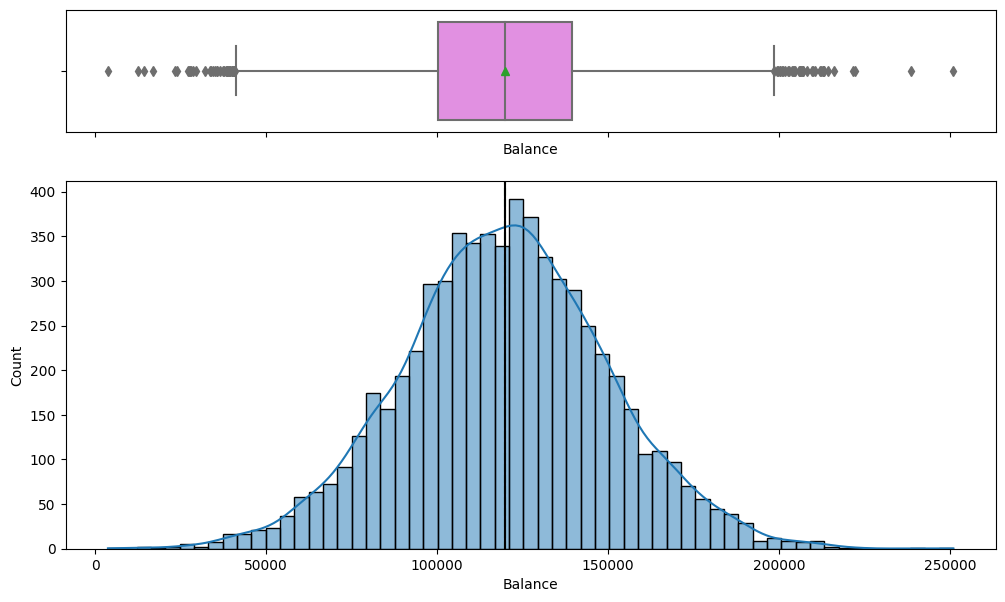

In [ ]:
feature='Balance'
print(histogram_boxplot(dataG0, feature, figsize=(12, 7), kde=True, bins=None))

**CONCLUSION**: The histogram for Balance is skewed to the left.
Mean (76485.89)< Median (97198.54). The distribution looks skewed normal.

Min balance of customers is $0.

Balance of 25% of customers is $0.

Balance of 50% of customers is at most $97198.54.

Balance of 75% of customers is at most $127644.24.

Max balance of customers is $250898.09.

There are 3617 outliers on the left. That is, 3617 customers have zero balance.

There is 1 outlier on the right. That is, 1 customer has balance = $250898.09.

**NOTE**: Once we remove the customers with the zero balance, we see a different picture:

The histogram for Balance is only slightly skewed to the left.
Mean (119827.49)< Median (119839.69). The distribution looks normal.

Min balance of customers is $3768.69.

Balance of 25% of customers is at most $100181.98.

Balance of 50% of customers is at most $119839.69.

Balance of 75% of customers is at most $139512.29.

Max balance of customers is $250898.09.

There are 36 outliers on the left. That is, 36 customers have balance <=$41186.5.

There are 37 outliers on the right. That is, 37 customers have balance >=$198507.76.

#####EstimatedSalary

Q1 quartile:  51002.11
Q2 quartile:  100193.915
Q3 quartile:  149388.2475
IQR:  98386.1375
Whisker1:  11.58
Whisker2:  199992.48
Min:  11.58
Mean:  100090.239881
Max:  199992.48
1 (0.01%) of customers: <= 11.58
1 (0.01%) of customers: >= 199992.48
None


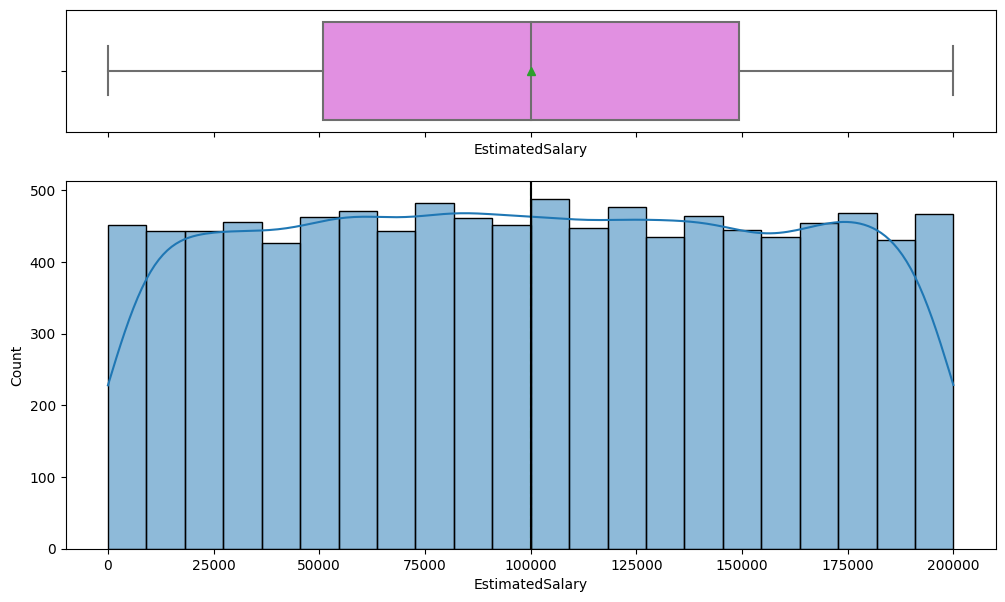

In [ ]:
feature='EstimatedSalary'
print(histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None))

In [ ]:
data[data['EstimatedSalary']<200]['EstimatedSalary'].value_counts()

11.58     1
142.81    1
178.19    1
106.67    1
96.27     1
123.07    1
143.34    1
91.75     1
90.07     1
Name: EstimatedSalary, dtype: int64

In [ ]:
dataESG100=data[data['EstimatedSalary']>100]

Q1 quartile:  51109.490000000005
Q2 quartile:  100238.11
Q3 quartile:  149400.1075
IQR:  98290.61750000001
Whisker1:  106.67
Whisker2:  199992.48
Min:  106.67
Mean:  100130.26301920769
Max:  199992.48
1 (0.01%) of customers: <= 106.67
1 (0.01%) of customers: >= 199992.48
None


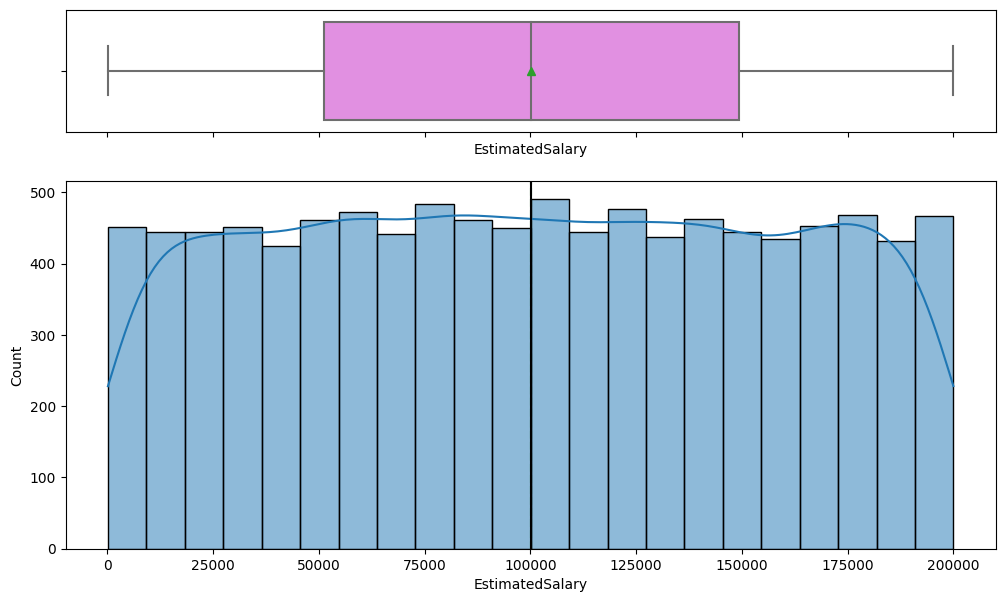

In [ ]:
feature='EstimatedSalary'
print(histogram_boxplot(dataESG100, feature, figsize=(12, 7), kde=True, bins=None))

**CONCLUSION**: The distribution looks uniform.

Min salary of customers is $11.58.

Salary of 25% of customers is at most $51002.11.

Salary of 50% of customers is at most $100193.92.

Salary of 75% of customers is at most $149388.25.

Max salary of customers is $199992.48.

There is 1 outlier on the left. That is, 1 customer has salary = $11.58.

There is 1 outlier on the right. That is, 1 customer has salary = $199992.48.

**NOTE**: Since the distribution looks uniform, removing outliers will not result in a significantly different picture (see above).

### Bivariate analysis

####Correlation Check

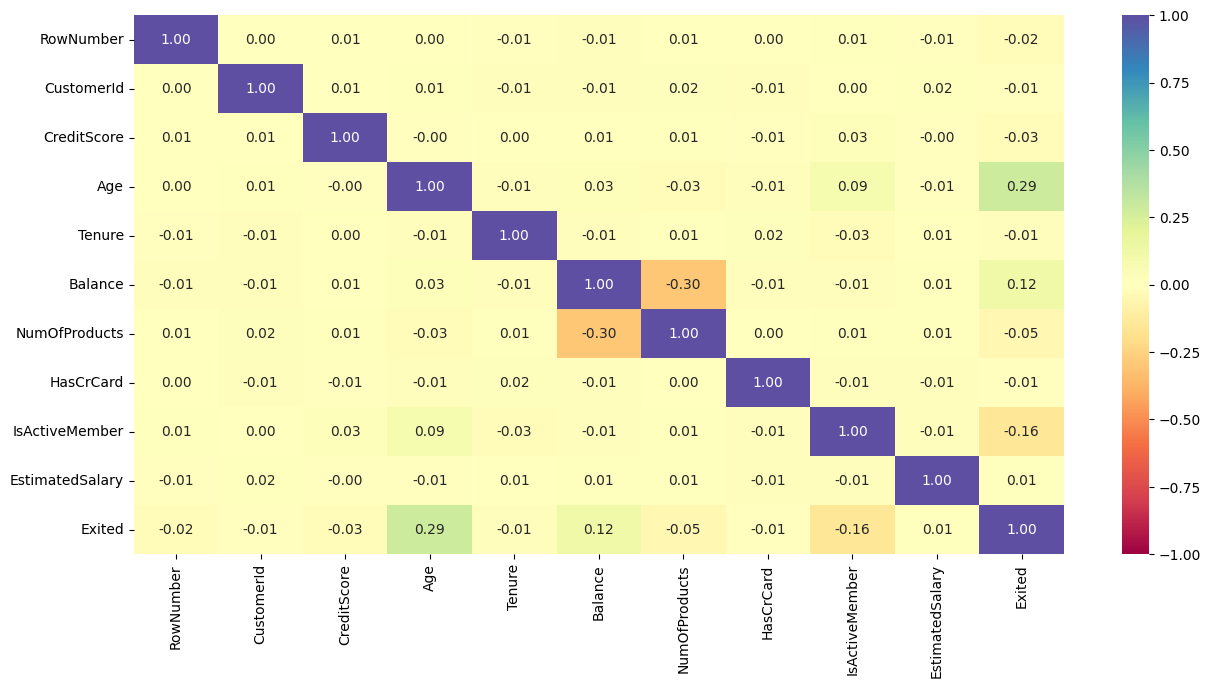

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
corr_mat = data.corr()

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()

sorted_mat[sorted_mat<1]

NumOfProducts   Balance          -0.304180
Balance         NumOfProducts    -0.304180
IsActiveMember  Exited           -0.156128
Exited          IsActiveMember   -0.156128
                NumOfProducts    -0.047820
                                    ...   
Age             IsActiveMember    0.085472
Balance         Exited            0.118533
Exited          Balance           0.118533
                Age               0.285323
Age             Exited            0.285323
Length: 110, dtype: float64

**CONCLUSION**:

1.   There is some negative correlation between Balance and NumOfProducts (-0.3).
2.   There is some positive correlation between Age and Exited (0.29).
3. We notice that there is a slight negative correlation between IsActiveMember and Exited (-0.16). Also, there is a slight positive correlation between Balance and Exited (0.12).

####Exited vs Categorical Variables

#####Exited vs Geography

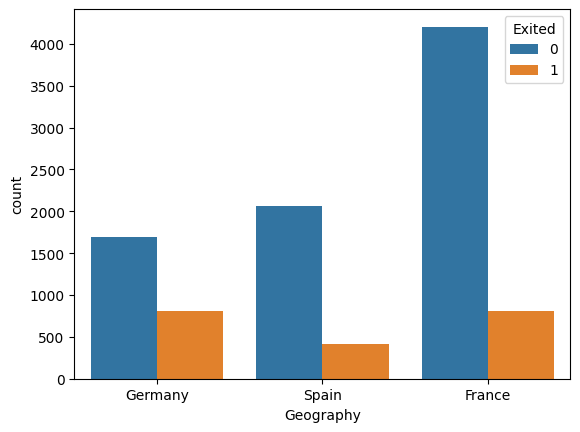

In [ ]:
order=['Germany', 'Spain', 'France']
hue_order = [0, 1]
sns.countplot(data=data,x='Geography', hue='Exited', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


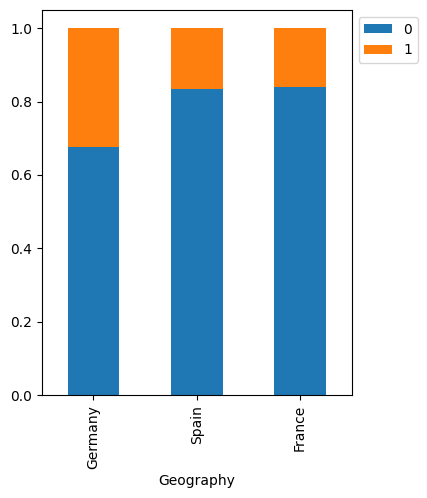

In [ ]:
stacked_barplot(data, "Geography", "Exited")

**CONCLUSION**: In each country the number of customers who did not leave the bank within six months is significantly higher than the number of customers who left the bank. Moreover, the ratio is the biggest in France and Spain.

#####Exited vs Gender

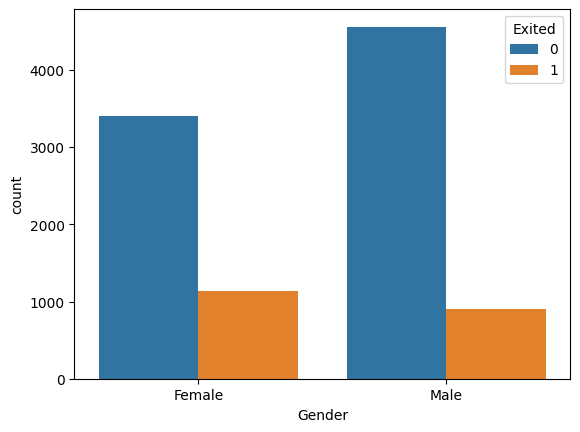

In [ ]:
order=['Female', 'Male']
hue_order = [0, 1]
sns.countplot(data=data,x='Gender', hue='Exited', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


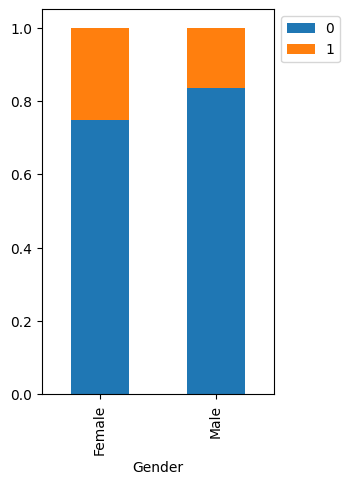

In [ ]:
stacked_barplot(data, "Gender", "Exited")

**CONCLUSION**: For each gender the number of customers who did not leave the bank within six months is significantly higher than the number of customers who left the bank.
Moreover, the ratio is the biggest for males.

#####Exited vs Tenure

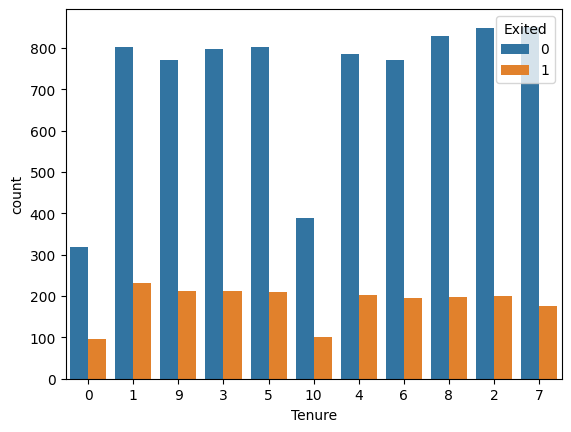

In [ ]:
order=[0,1,9,3,5,10,4,6,8,2,7]
hue_order = [0, 1]
sns.countplot(data=data,x='Tenure', hue='Exited', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


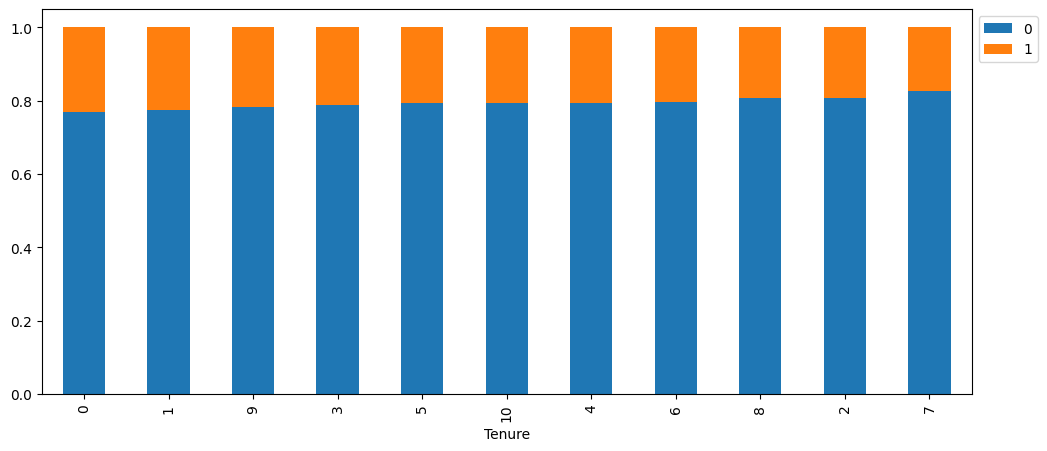

In [ ]:
stacked_barplot(data, "Tenure", "Exited")

**CONCLUSION**: Regardless of the number of years for which the customers have been with the bank, the number of customers who did not leave the bank within six months is significantly higher than the number of customers who left the bank.

#####Exited vs NumOfProducts

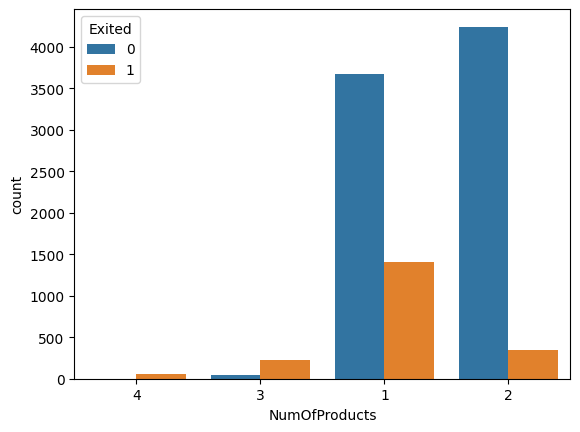

In [ ]:
order=[4,3,1,2]
hue_order = [0, 1]
sns.countplot(data=data,x='NumOfProducts', hue='Exited', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


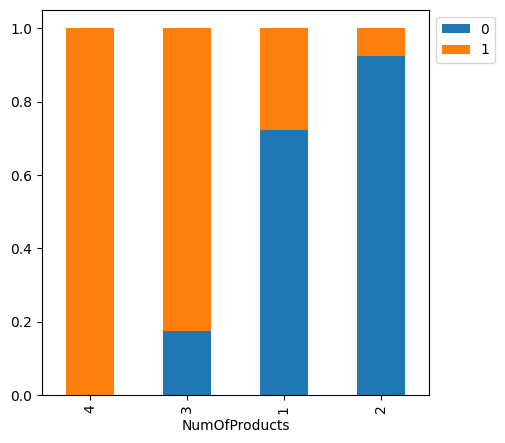

In [ ]:
stacked_barplot(data, "NumOfProducts", "Exited")

**CONCLUSION**:

*   GROUP 1 (Customers who purchased 1 or 2 products through the bank):
In this group, the number of customers who did not leave the bank within six months is significantly higher than the number of customers who left the bank.
Moreover, the ratio is the biggest for customers who purchased only 1 product through the bank.
*   GROUP 2 (Customers who purchased 3 products through the bank):
In this group, the number of customers who did not leave the bank within six months is significantly lower than the number of customers who left the bank.
* GROUP 3 (Customers who purchased 4 products through the bank):
All customers from this group left the bank within six months.

#####Exited vs HasCrCard

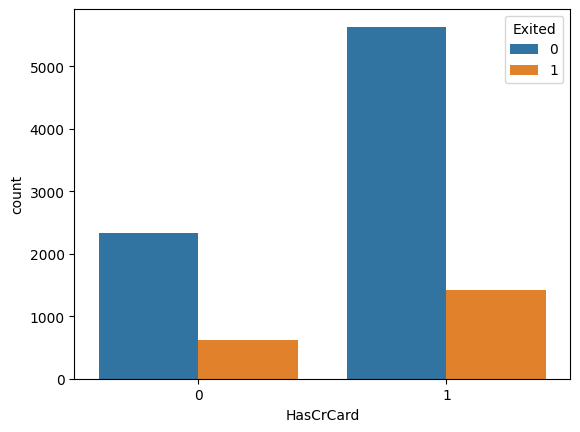

In [ ]:
order=[0, 1]
hue_order = [0, 1]
sns.countplot(data=data,x='HasCrCard', hue='Exited', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


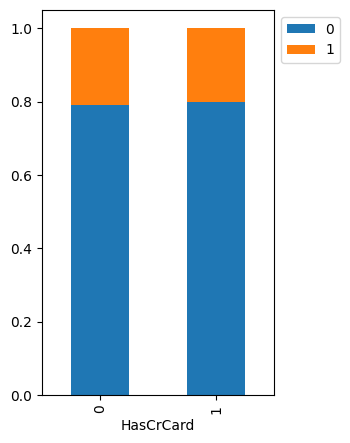

In [ ]:
stacked_barplot(data, "HasCrCard", "Exited")

**CONCLUSION**: In each group, the number of customers who did not leave the bank within six months is significantly higher than the number of customers who left the bank.

#####Exited vs IsActiveMember

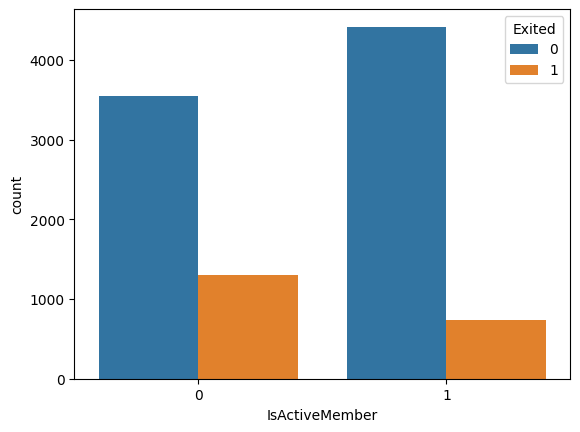

In [ ]:
order=[0, 1]
hue_order = [0, 1]
sns.countplot(data=data,x='IsActiveMember', hue='Exited', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


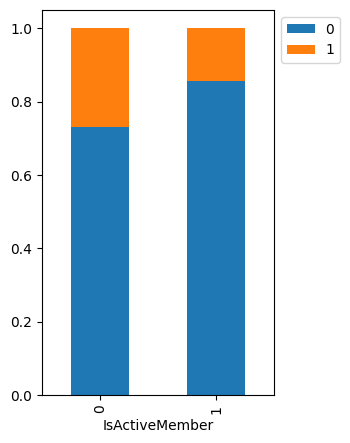

In [ ]:
stacked_barplot(data, "IsActiveMember", "Exited")

**CONCLUSION**: In each group, the number of customers who did not leave the bank within six months is significantly higher than the number of customers who left the bank. The ratio is the biggest for active members.

####Exited vs Numerical Variables

#####Exited vs CreditScore

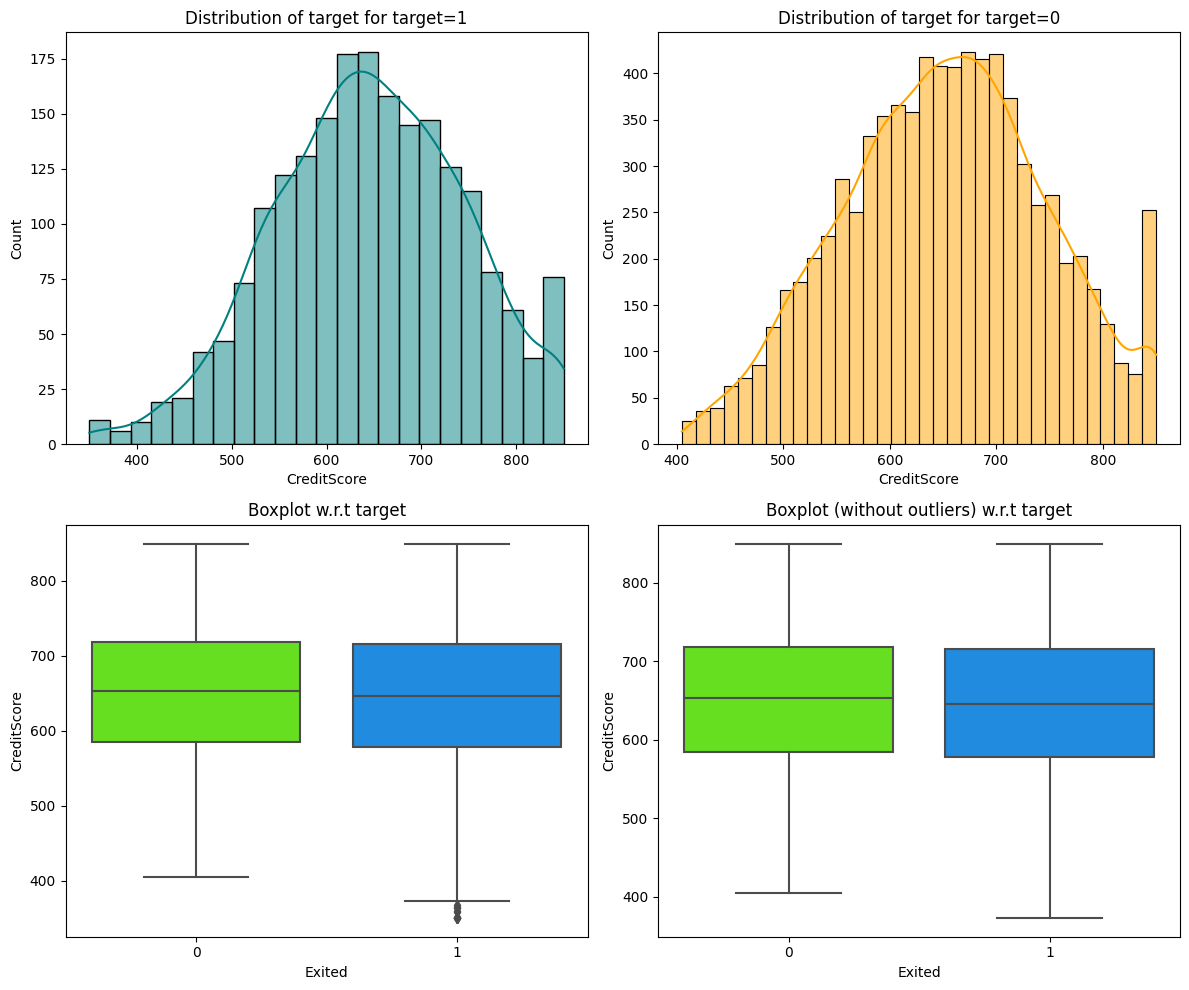

In [ ]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

In [ ]:
dataL850=data[data['CreditScore']<850]

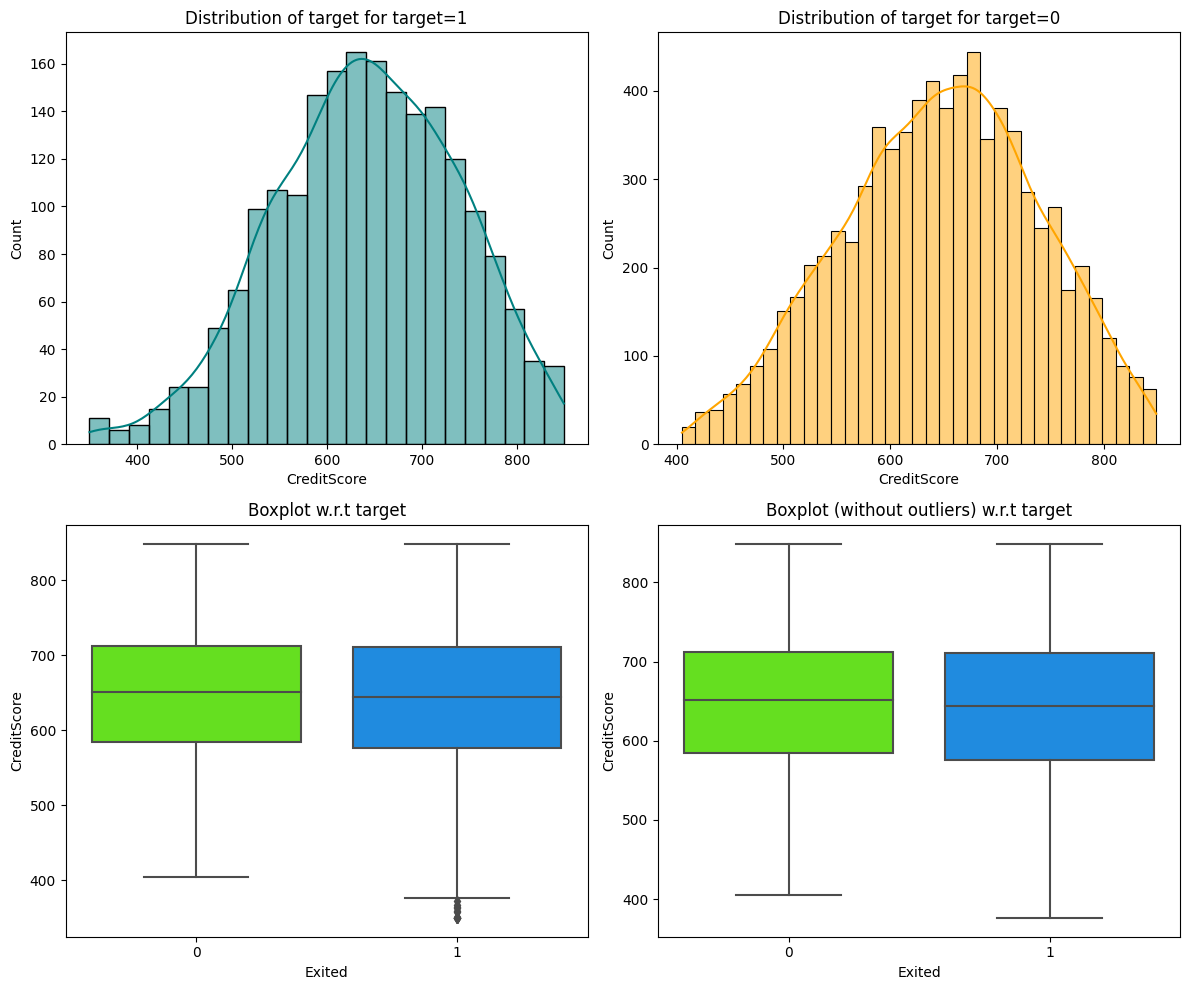

In [ ]:
distribution_plot_wrt_target(dataL850, "CreditScore", "Exited")

**CONCLUSION**:

The histograms for CreditScore are slightly skewed to the left.

The distributions look skewed normal.

The quartiles and the whiskers are about the same.

There are many outliers. Most of them are customers whose credit score is 850.



#####Exited vs Age

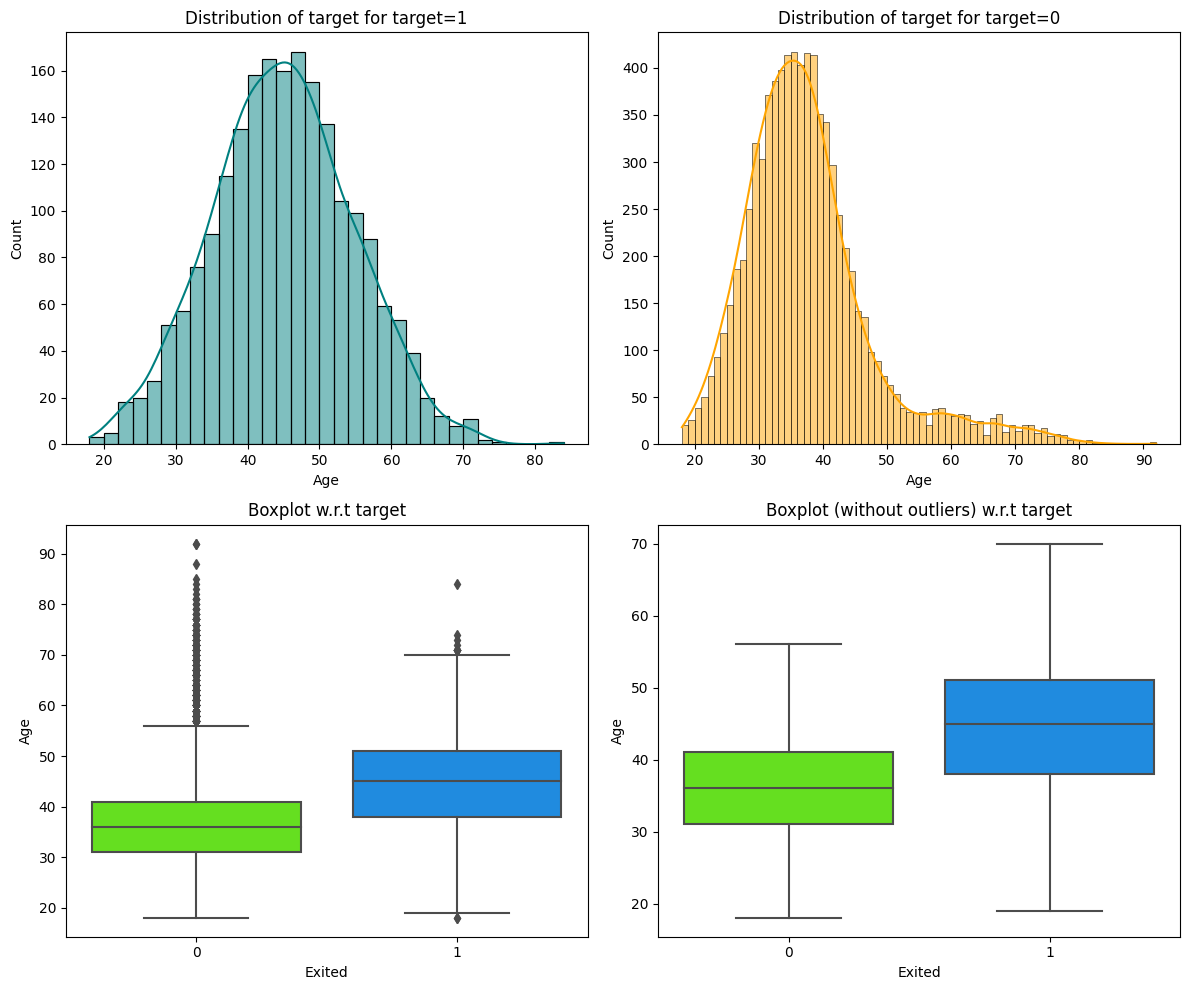

In [ ]:
distribution_plot_wrt_target(data, "Age", "Exited")

**CONCLUSION**:

The histogram for Age is slightly skewed to the right for those customers who left the bank within six months. The distribution looks skewed normal.

The histogram for Age is heavily skewed to the right for those customers who did not leave the bank within six months. The distribution looks skewed normal.

The quartiles and the upper whisker are bigger for those customers who left the bank within six months.

We also notice that there are many outliers where customers did not leave the bank within six months. There are some outliers where customers left the bank within six months.




#####Exited vs Balance

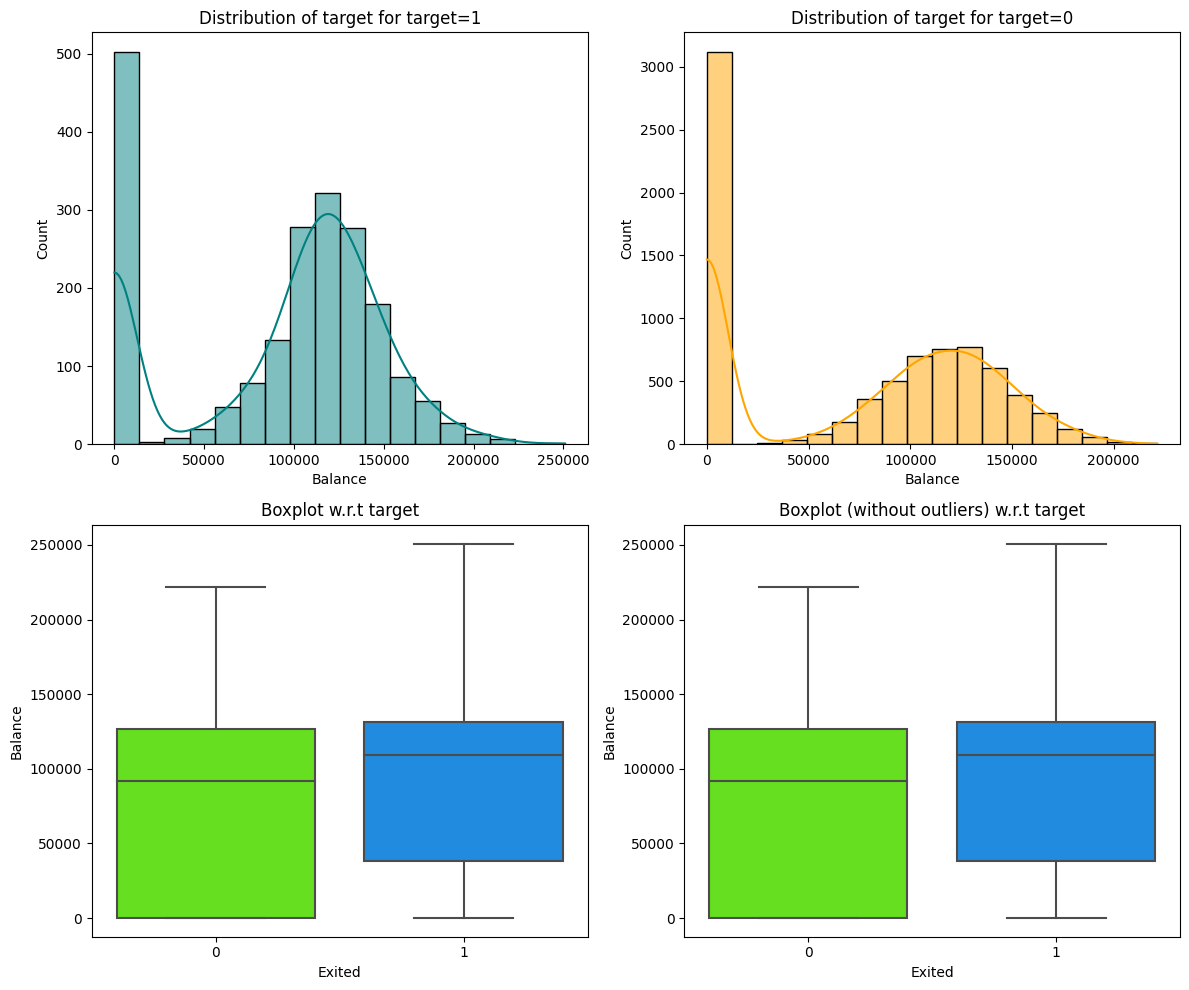

In [ ]:
distribution_plot_wrt_target(data, "Balance", "Exited")

In [ ]:
dataG0=data[data['Balance']>0]

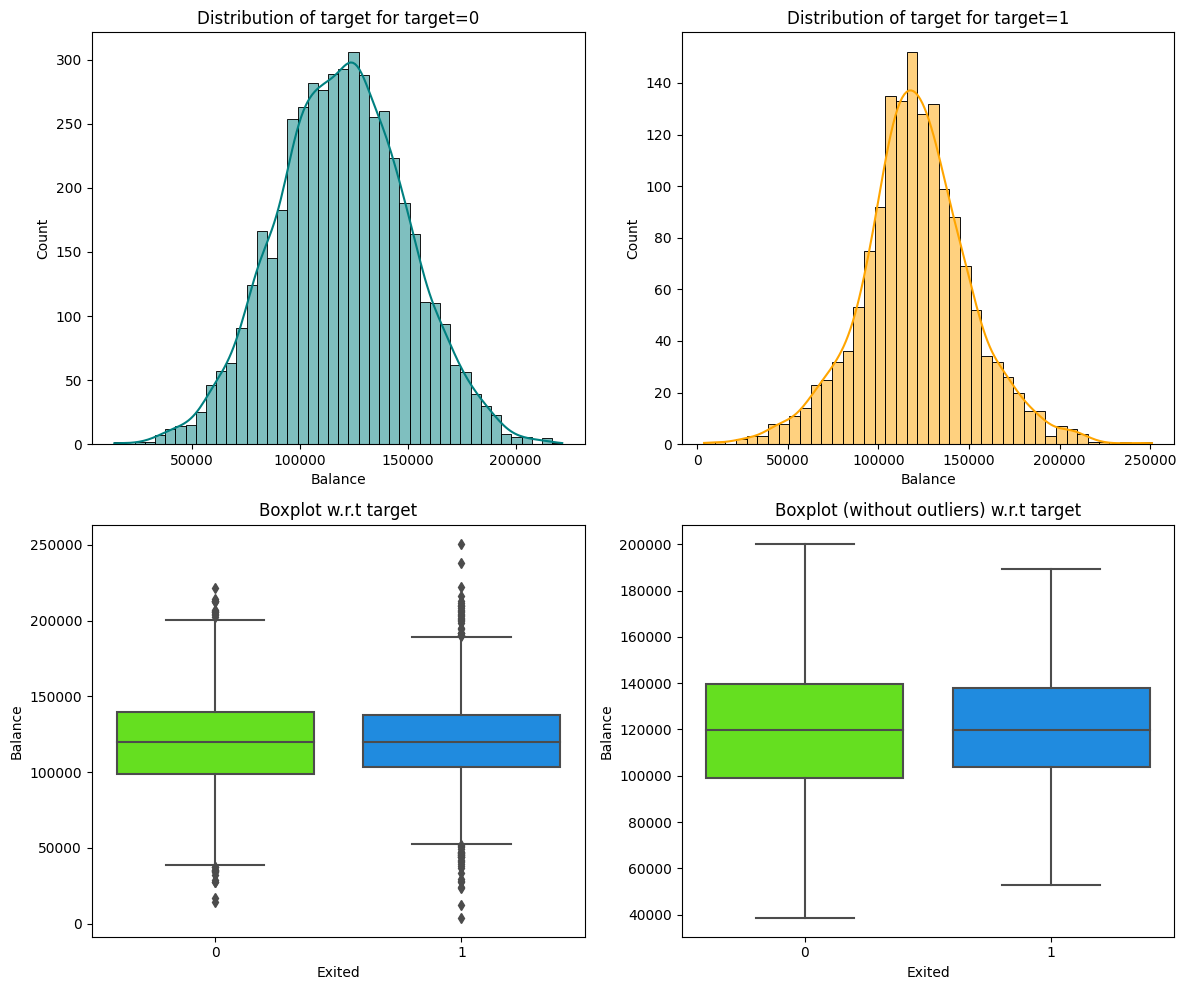

In [ ]:
distribution_plot_wrt_target(dataG0, "Balance", "Exited")

**CONCLUSION**:

The histograms for Balance are skewed to the left.
The distributions look skewed normal.

The Q1, Q2, Q3 quartiles and the upper whisker are bigger for those customers who left the bank within six months.

There are many outliers on the left in both cases. These are the customers
who have zero balance.

Once we remove the customers with the zero balance, we see a different picture:

The histograms are only slightly skewed to the left.
The distributions look normal.

The IQRs and the whiskers are wider where customers did not leave the bank within six months. The Q2 quartiles are about the same.



#####Exited vs EstimatedSalary

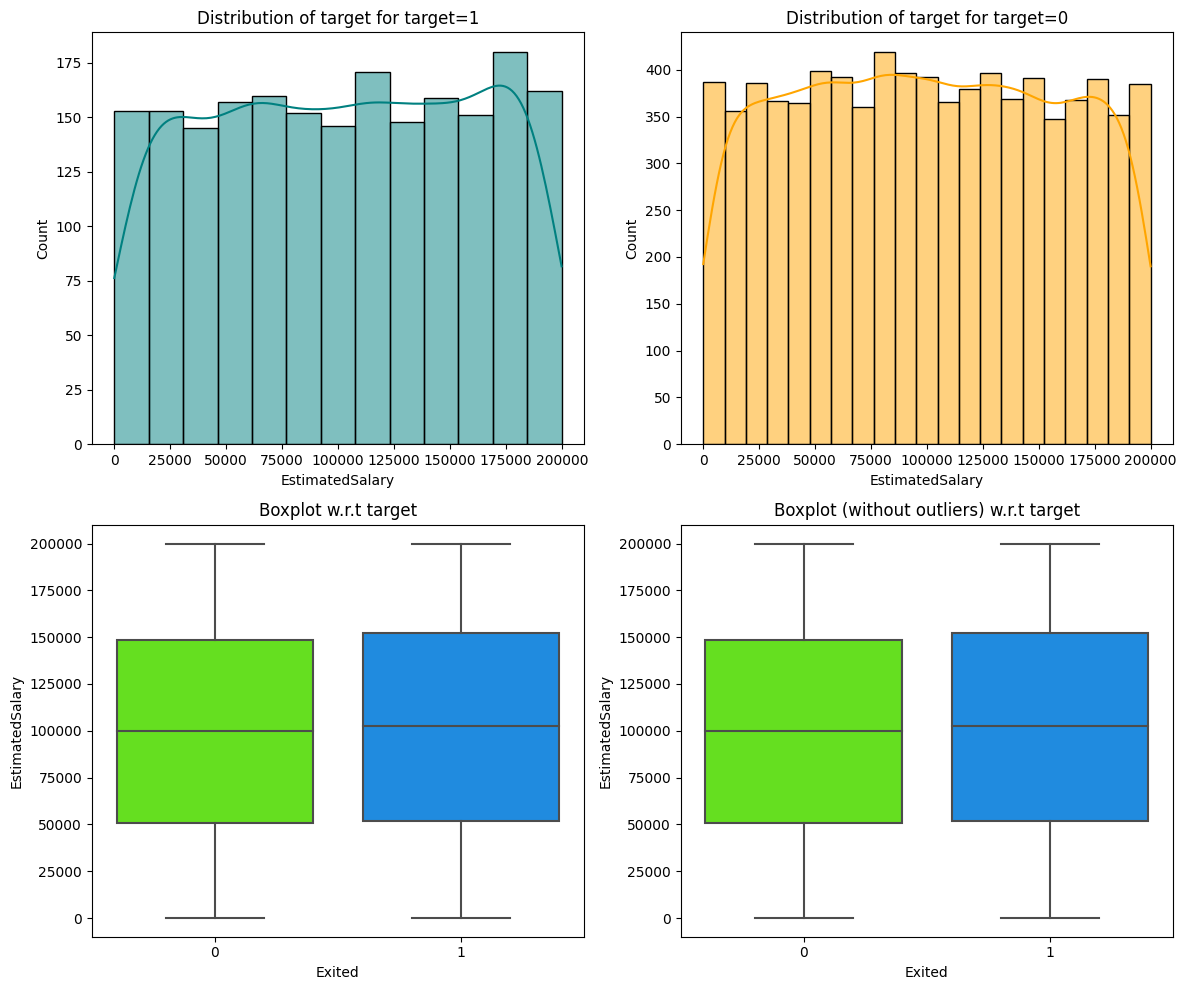

In [ ]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

**CONCLUSION**:

The distributions of EstimatedSalary look uniform in both cases.

The quartiles and the whiskers are about the same.



## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Drop unnecessary columns

In [ ]:
# let's create a copy of the data to avoid any changes to original data
data1 = data.copy()

In [ ]:
data.shape

(10000, 14)

In [ ]:
# Since the CustomerId column consists of clients' IDs,
# it will not add any value to the modeling
#For the same reason we drop the RowNumber and Surname column
data1.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [ ]:
data1.shape

(10000, 11)

In [ ]:
data1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##Data Preparation for Modeling

###Define independent and dependent variables

In [ ]:
X = data1.drop(["Exited"], axis=1)
y = data1["Exited"]

In [ ]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


###Creating dummy variables

In [ ]:
# creating dummy varibles on Geography and Gender
X = pd.get_dummies(X,
                   columns=["Geography", "Gender"],
                   drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
X.shape

(10000, 11)

###Split the data into train, validation, and test sets

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)
print(X_large.shape, X_test.shape)
print(y_large.shape, y_test.shape)

(8000, 11) (2000, 11)
(8000,) (2000,)


In [ ]:
# Splitting the dataset into the Training and Testing set.
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(6400, 11) (1600, 11)
(6400,) (1600,)


###Normalize the numerical data

In [ ]:
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

####Create a function for plotting the confusion matrix

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model1():
  # Initializing the ANN
  model = Sequential()
  # Add the input layer with 64 neurons with relu as activation function with input of 11 variables
  model.add(Dense(activation = 'relu', input_dim = 11, units=64))

  # Add the 1st hidden layer with 32 neurons
  model.add(Dense(32, activation='relu'))

  # Add the output layer with one node and sigmoid activation function
  # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
  # We use the sigmoid because we want probability outcomes
  model.add(Dense(1, activation = 'sigmoid'))
  return model

In [ ]:
model = build_model1()

In [ ]:
## Compile the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## The summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Fitting the model on train data for 100 epochs
history=model.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7964 - val_loss: 0.4583 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4357 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8034 - val_loss: 0.4306 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.4254 - val_accuracy: 0.8144

####Loss function

63/63 [==============================] - 0s 1ms/step - loss: 0.3465 - accuracy: 0.8570


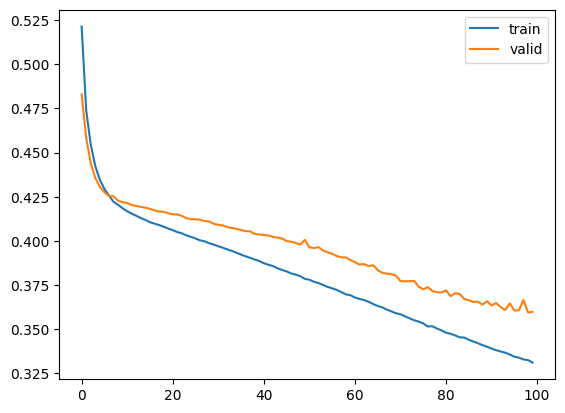

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
results = model.evaluate(X_test,y_test)

####Confusion matrix

50/50 [==============================] - 0s 961us/step


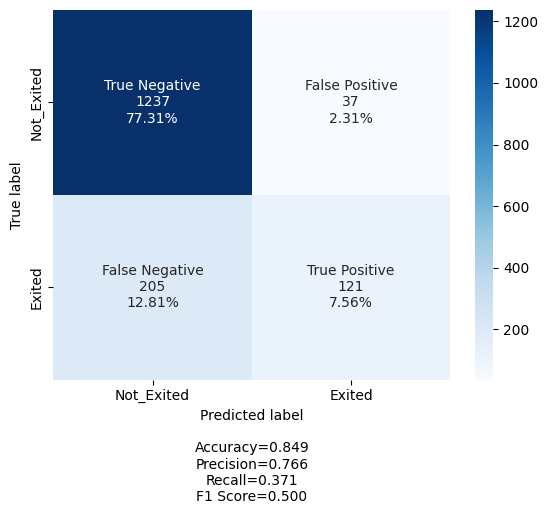

In [ ]:
## Here we obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
#cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**CONCLUSION**: We can see that the recall is pretty low and our model has to be improved.

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def build_model2():
      ## Initializing the neural network
      model = Sequential()

      ##Add the input layer with 64 neurons and relu as activation function
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))

      ##Add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(32,activation='relu'))

      ##Add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = 'sigmoid'))

      ##Initialize the model with Adam Optimer
      optimizer = tf.keras.optimizers.Adam(0.001)

      ##Compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

      return model

In [ ]:
model = build_model2()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Fitting the model on train data
history = model.fit(X_train, y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4799 - accuracy: 0.7788 - val_loss: 0.4378 - val_accuracy: 0.8119
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8195 - val_loss: 0.4245 - val_accuracy: 0.8206
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8269 - val_loss: 0.4159 - val_accuracy: 0.8319
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8350 - val_loss: 0.4131 - val_accuracy: 0.8281
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8369 - val_loss: 0.3950 - val_accuracy: 0.8375
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8453 - val_loss: 0.3866 - val_accuracy: 0.8456
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8477 - val_loss: 0.3749 - val_accuracy: 0.8456

####Loss function

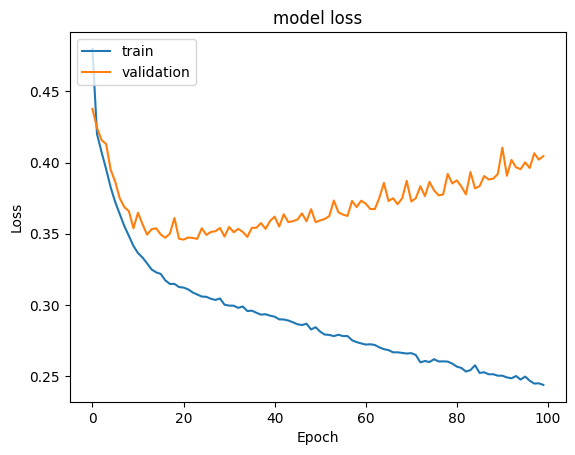

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**CONCLUSION**: The above image clearly shows that this model is severely overfitting.
The best solution for the above problem is Early stopping.
Let us find the optimal point where the training should be stopped.



####Confusion matrix

50/50 [==============================] - 0s 1ms/step


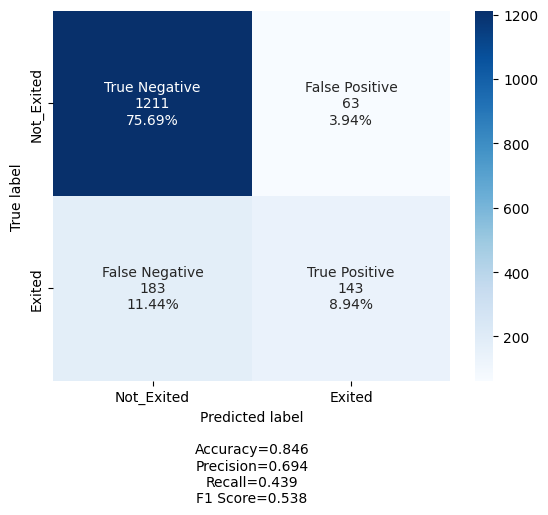

In [ ]:
## Here we obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
#cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**CONCLUSION**: The new recall (0.439) is better than before (0.371), but is still low.

####Early stopping

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after certain iterations. The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [ ]:
#Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## Here we call the build_model() function
model_e=build_model2()

In [ ]:
## We now train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model_e.fit(X_train, y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val, y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5036 - accuracy: 0.7473 - val_loss: 0.4338 - val_accuracy: 0.8031
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8189 - val_loss: 0.4172 - val_accuracy: 0.8213
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8325 - val_loss: 0.4064 - val_accuracy: 0.8381
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8352 - val_loss: 0.4007 - val_accuracy: 0.8356
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8394 - val_loss: 0.3940 - val_accuracy: 0.8350
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8448 - val_loss: 0.3829 - val_accuracy: 0.8450
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8462 - val_loss: 0.3803 - val_accuracy: 0.8438

Note that we *early* stopped at Epoch 22.

####Loss function

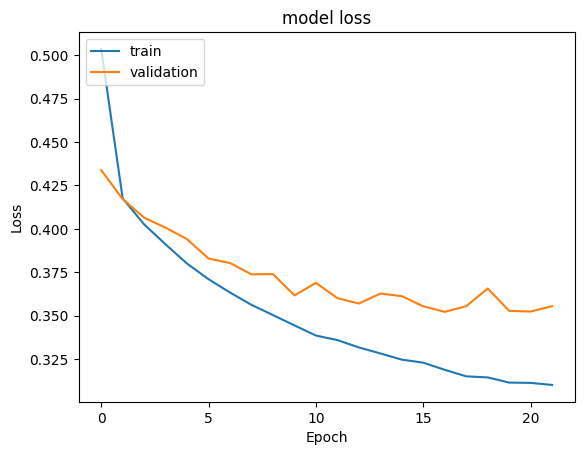

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**CONCLUSION**: We reduced the overfitting.

####Confusion matrix

50/50 [==============================] - 0s 2ms/step


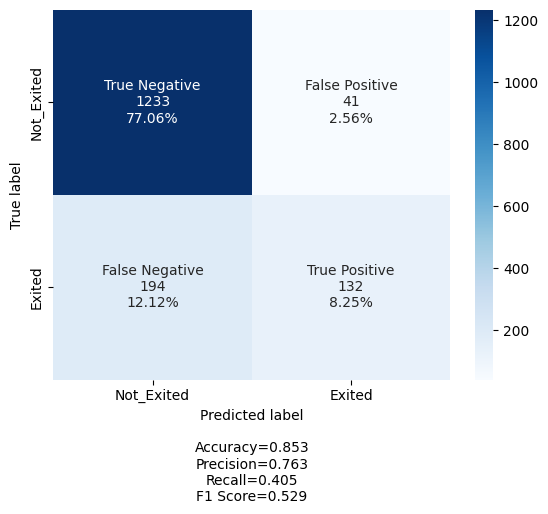

In [ ]:
## Here we obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model_e.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
#cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**CONCLUSION**: The recall is about the same as before: 0.405 vs 0.439.

####ROC-AUC

Let's tune the threshold using ROC-AUC


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.166815, G-Mean=0.811


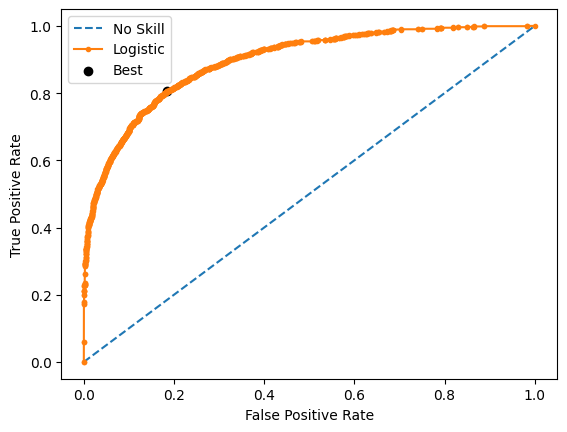

In [ ]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

####Predict the results using the best threshold

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 983us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

####Classification report

In [ ]:
## Here obtain the classification report
cr=metrics.classification_report(y_val, y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1274
           1       0.49      0.74      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.77      0.73      1600
weighted avg       0.84      0.79      0.81      1600



####Confusion matrix

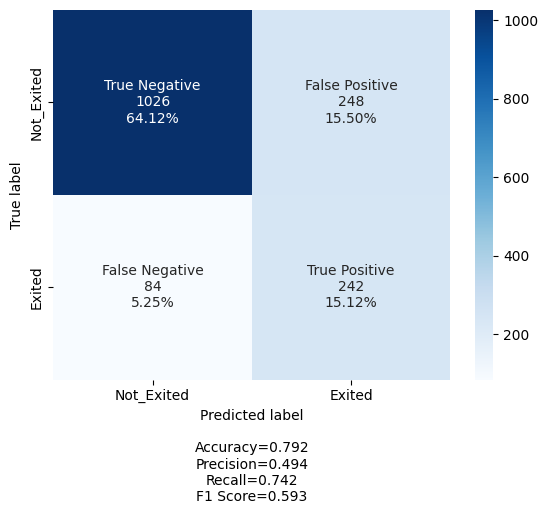

In [ ]:
cm1=confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**CONCLUSION**: We significantly improved the recall: 0.742 vs 0.439.

### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def build_model3():
  #Initializing the neural network
  model = Sequential()

  #Adding the input layer with 32 neurons and relu as activation function
  model.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

  # Adding dropout with dropout_rate= 0.2
  model.add(Dropout(0.2))

  # Adding the first hidden layer with 16 neurons with relu as activation functions
  model.add(Dense(16,activation='relu'))

  # Adding dropout with dropout_rate= 0.1
  model.add(Dropout(0.2))
  # Adding the second hidden layer with 8 neurons with relu as activation functions
  model.add(Dense(8,activation='relu'))

  # Adding the output layer
  model.add(Dense(1, activation = 'sigmoid'))

  return model


In [ ]:
model3 = build_model3()

In [ ]:
# Summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model with binary cross entropy as loss function and accuracy as metrics
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history3 = model3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5183 - accuracy: 0.7533 - val_loss: 0.4546 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7956 - val_loss: 0.4388 - val_accuracy: 0.7962
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8000 - val_loss: 0.4350 - val_accuracy: 0.8025
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8052 - val_loss: 0.4333 - val_accuracy: 0.8119
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8033 - val_loss: 0.4301 - val_accuracy: 0.8062
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8062 - val_loss: 0.4270 - val_accuracy: 0.8156
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8144 - val_loss: 0.4233 - val_accuracy: 0.8150

####Loss function

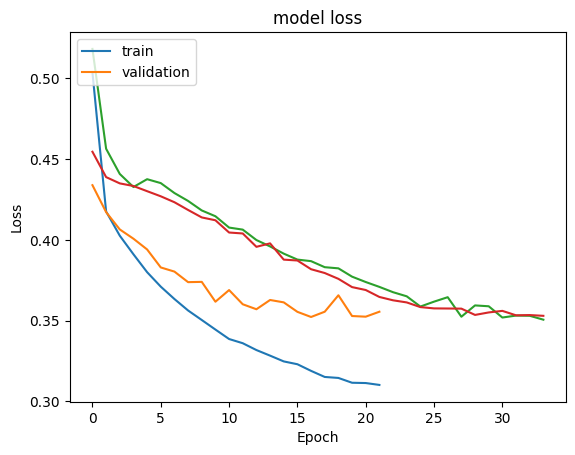

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

200/200 [==============================] - 0s 987us/step
Best Threshold=0.202781, G-Mean=0.789


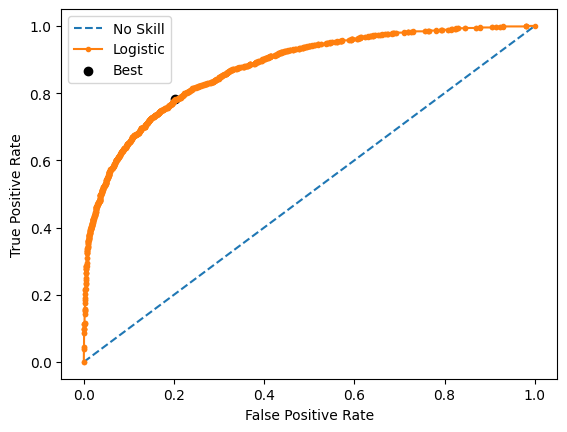

In [ ]:
# predict probabilities
yhat = model3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

####Predict the results using  the best  threshold

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 971us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

####Classification report

In [ ]:
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1274
           1       0.47      0.76      0.58       326

    accuracy                           0.78      1600
   macro avg       0.70      0.77      0.72      1600
weighted avg       0.83      0.78      0.80      1600



####Confusion matrix

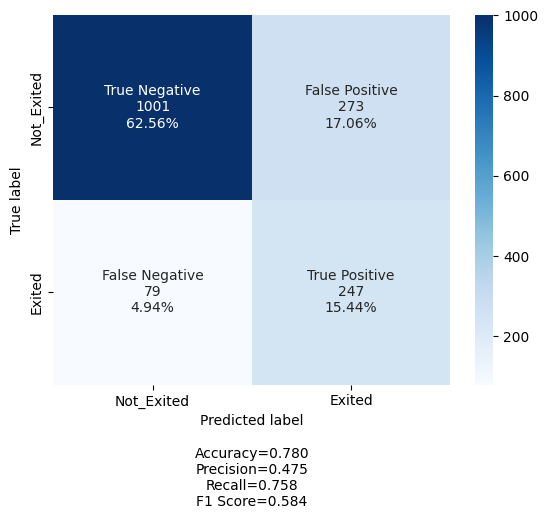

In [ ]:
cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**CONCLUSION**: The new recall (0.758) is slightly better than before (0.742).

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):
    np.random.seed(1337)

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Compile the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

####Using Grid search

We are using grid search to optimize two hyperparameters called batch size, epochs due to the limited time.

In [ ]:
model_v2 = create_model_v2()

In [ ]:
## Calling the create_model_v2 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=model_v2, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128]}


kfold_splits = 3

grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
## Fitting the model on train data
grid_result = grid.fit(X_train,y_train,validation_data = (X_val,y_val),verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 3 candidates, totalling 9 fits


160/160 [==============================] - 1s 3ms/step - loss: 0.4869 - accuracy: 0.7917 - val_loss: 0.4416 - val_accuracy: 0.7987
Best: 0.799844 using {'batch_size': 40}


####Let's create the final model with the obtained configuration after hyperparameter tuning

In [ ]:
# Creating the model
estimator_v2=create_model_v2(lr=0.01)
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Fitting the model on train data abd train the model with best batch_size obtained from hyperparameter tuning
history_h=estimator_v2.fit(X_train,y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100


160/160 [==============================] - 2s 3ms/step - loss: 0.4550 - accuracy: 0.7983 - val_loss: 0.4364 - val_accuracy: 0.8031
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8167 - val_loss: 0.4116 - val_accuracy: 0.8269
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8259 - val_loss: 0.4115 - val_accuracy: 0.8306
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8331 - val_loss: 0.3984 - val_accuracy: 0.8456
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8341 - val_loss: 0.3945 - val_accuracy: 0.8325
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8413 - val_loss: 0.3783 - val_accuracy: 0.8400
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8436 - val_loss: 0.3628 - val_accuracy: 0.8450
Epoch 8/100

####Loss function

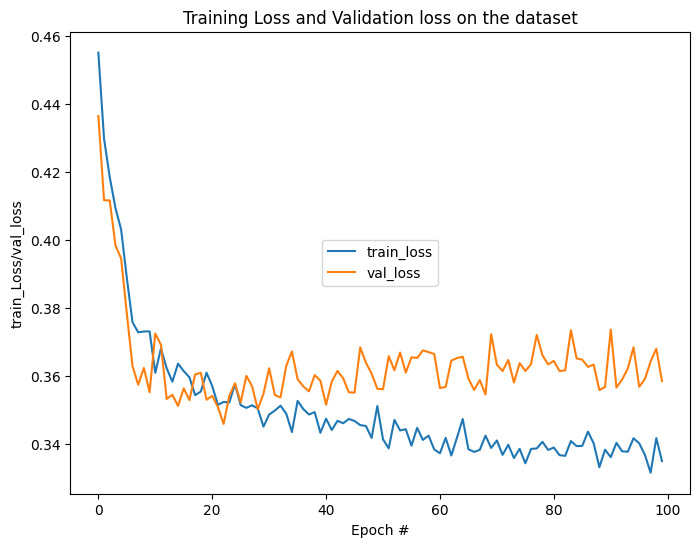

In [ ]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

####Threshold

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.211988, G-Mean=0.807


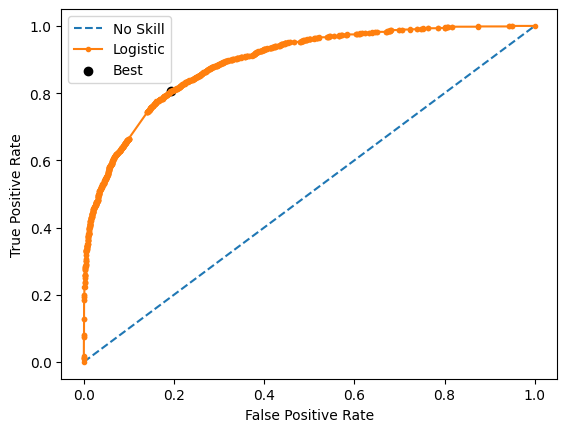

In [ ]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

####Predict the results using the best threshold

In [ ]:
# Here we obtain the predictions on X_val
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)

50/50 [==============================] - 0s 1ms/step
[[0.29885596]
 [0.00304068]
 [0.04757223]
 ...
 [0.1665427 ]
 [0.49407014]
 [0.6089484 ]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[ True]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


####Classification report

In [ ]:
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1274
           1       0.46      0.76      0.57       326

    accuracy                           0.77      1600
   macro avg       0.69      0.77      0.71      1600
weighted avg       0.83      0.77      0.79      1600



####Confusion matrix

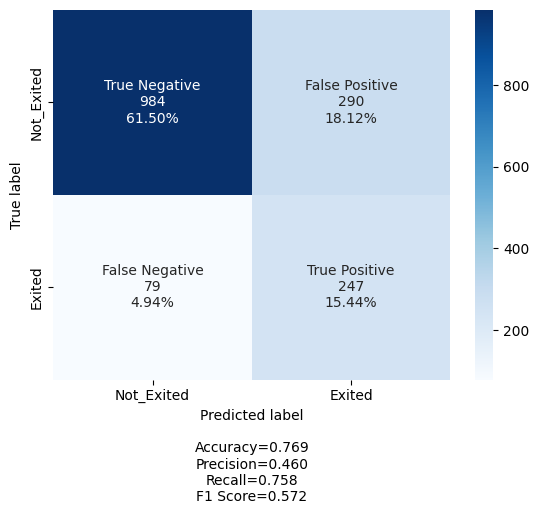

In [ ]:
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**CONCLUSION**: The new recall (0.758) is the same as before.

### Model Improvement: Neural Network model with balanced data

####Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.

In [ ]:
## Complete the code to apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train2, y_train2 = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train2.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train2.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



####Build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
## Initializing the neural network
model_4 = Sequential()

# Add the input layer of 32 neurons with relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train2.shape[1]))

# Adding dropout with dropout rate=0.2
model_4.add(Dropout(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))

# Adding the dropout
model_4.add(Dropout(0.1))

## Adding dense layers with 8 neurons
model_4.add(Dense(8,activation='relu'))

# Complete the code to add suitable activation function in the final layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
# Define earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
history_4 = model_4.fit(X_train2,y_train2,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100
160/160 [==============================] - 2s 4ms/step - loss: 0.6432 - accuracy: 0.6333 - val_loss: 0.5592 - val_accuracy: 0.7262
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7093 - val_loss: 0.5494 - val_accuracy: 0.7312
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7249 - val_loss: 0.5267 - val_accuracy: 0.7362
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7318 - val_loss: 0.5455 - val_accuracy: 0.7200
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7327 - val_loss: 0.5335 - val_accuracy: 0.7256
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.7353 - val_loss: 0.5340 - val_accuracy: 0.7300
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7435 - val_loss: 0.5139 - val_accuracy: 0.7362

####Loss function

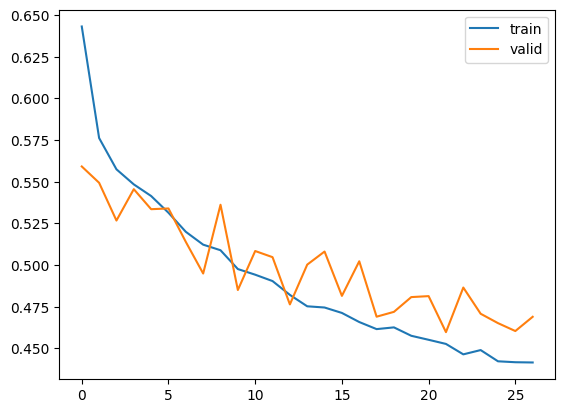

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

####Finding the optimal threshold

319/319 [==============================] - 0s 1ms/step
Best Threshold=0.516103, G-Mean=0.821


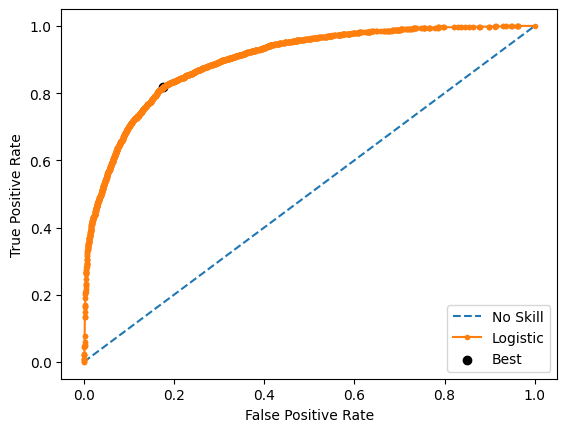

In [ ]:
## We find the optimal threshold using X_train2
yhat = model_4.predict(X_train2)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train2, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
## Obtain the predictions on X_val
y_pred_s = model_4.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

####Classification report

In [ ]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1274
           1       0.49      0.71      0.58       326

    accuracy                           0.79      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.79      0.80      1600



####Confusion matrix

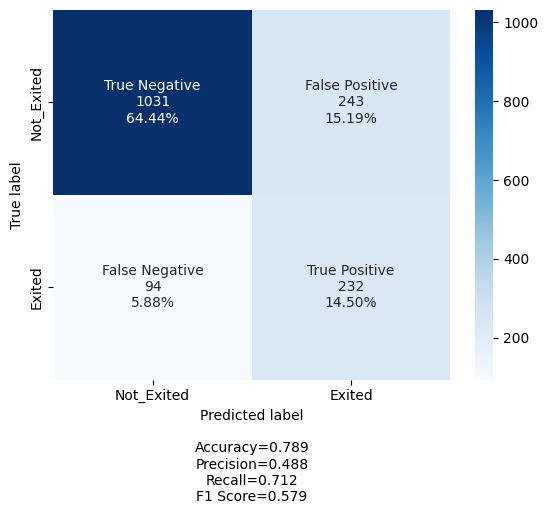

In [ ]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Final Model

319/319 [==============================] - 0s 1ms/step
Best Threshold=0.516103, G-Mean=0.821


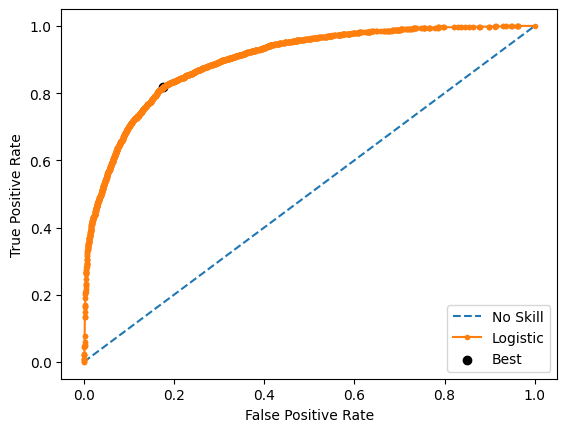

In [ ]:
# predict probabilities using the best model
yhat = model_4.predict(X_train2)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train2, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Predict the X_test data using the best model
y_pred_test = model_4.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


####Classification report

In [ ]:
## Complete the code to obtain the classification report on y_test and the predicted values
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



####Confusion report

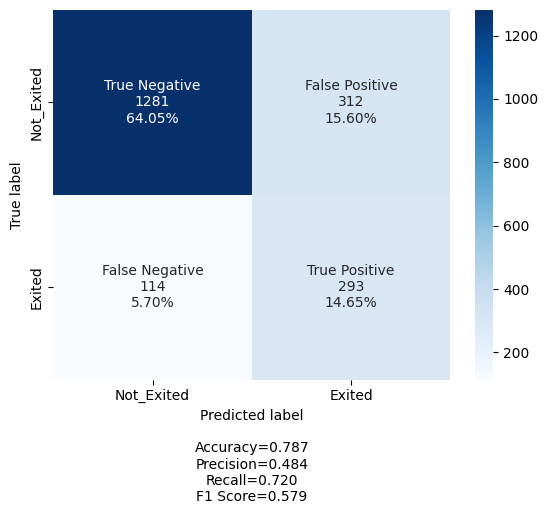

In [ ]:
# Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_test,y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Actionable Insights and Recommendations

### Business Insights

* The only "red flag" in the Data is EstimatedSalary, since the min ($11.58) doesn't look reasonable.

* The most popular last names are Smith, Scott, and Martin.

* More than half of the customers are from France.
The number of customers from Germany and from Spain is about the same.

* Only 3.3% of customers purchased more than 2 products through the bank.
Moreover, all customers who purchased 4 products through the bank left the bank within six months.

* About 30% of customers do not have credit cards.

* 48.5% of customers are not active members.

* 20.4% of customers left the bank within six months.

* There is some negative correlation between Balance and NumOfProducts.

* There is some positive correlation between Age and Exited.

* In each country the number of customers who did not leave the bank within six months is significantly higher than the number of customers who left the bank. Moreover, the ratio is the biggest in France and Spain.

* For each gender the number of customers who did not leave the bank within six months is significantly higher than the number of customers who left the bank.
Moreover, the ratio is lower for females than for males.

* The histogram for CreditScore has many outliers. Most of them are customers whose credit score is 850.

* In each group (Active and Not Active), the number of customers who did not leave the bank within six months is significantly higher than the number of customers who left the bank. The ratio is the biggest for active members.

* The histograms for Balance are skewed to the left. The distributions look skewed normal. There are many outliers on the left in both cases. These are the customers who have zero balance.

* The distribution of EstimatedSalary looks uniform.

### Recommedations to the bank

* The first thing that we notice is that 3.3% of customers purchased more than 2 products through the bank. Moreover, all customers who purchased 4 products through the bank left the bank within six months.

>So, if a customer purchases 3 or 4 products through the bank, it is a very strong indicator that this customer will leave the bank within six months.
We also recommend to improve the quality of the products.

* For each gender the number of customers who did not leave the bank within six months is significantly higher than the number of customers who left the bank.
However, we noticed that the ratio is lower for females than for males.

>Campaigns that attract more female customers could be useful.

* Model_3, model_v2, and model_4 give good recall scores. Our choice is model_4, because the train curve and the validation curve do not diverge significantly from each other.

* It is also important to note that the recalls in Model_3, model_v2, and model_4 depend on the random number generators. We ran this notebook multiple times and in many cases the recall in model_4 was better than in model_3 and in model_v2.




In [4]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/INN_Learner_Notebook_Full_m2.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/INN_Learner_Notebook_Full_m2.ipynb to html
[NbConvertApp] Writing 3407301 bytes to /content/drive/MyDrive/INN_Learner_Notebook_Full_m2.html
